In [59]:
import pandas as pd


In [60]:
import os

In [61]:
pwd

'd:\\Visual studio\\Projects\\Customer_Churn'

In [62]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_csv("D:\Visual studio\Projects\Customer_Churn\customer_churn_large_dataset.csv")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [64]:
df.drop('Name', axis='columns', inplace=True)
df.dtypes

CustomerID                      int64
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [65]:
df.Total_Usage_GB.values

array([236, 172, 460, ..., 251, 434, 173], dtype=int64)

In [66]:
df[pd.to_numeric(df.Monthly_Bill, errors='coerce').isnull()]

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [67]:
df.shape

(100000, 8)

In [68]:
df1= df[df.Total_Usage_GB!='']
df1.shape

(100000, 8)

In [69]:
df1.Total_Usage_GB.dtypes

dtype('int64')

In [70]:
pd.to_numeric(df.Total_Usage_GB)

0        236
1        172
2        460
3        297
4        266
        ... 
99995    226
99996    351
99997    251
99998    434
99999    173
Name: Total_Usage_GB, Length: 100000, dtype: int64

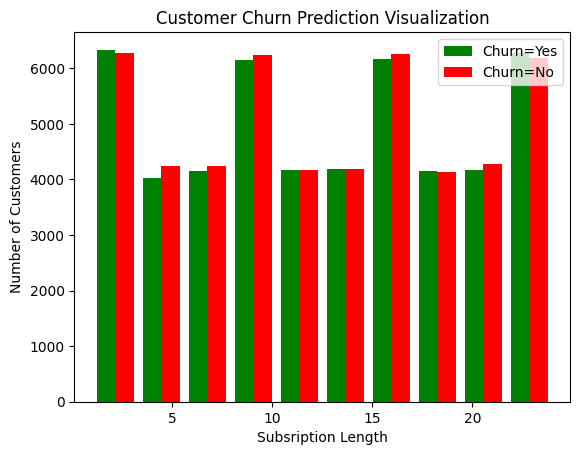

In [152]:
tenure_churn_no= df1[df1.Churn==0].Subscription_Length_Months
tenure_churn_yes= df1[df1.Churn==1].Subscription_Length_Months

plt.xlabel("Subsription Length")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label= ['Churn=Yes', 'Churn=No'])
plt.legend()

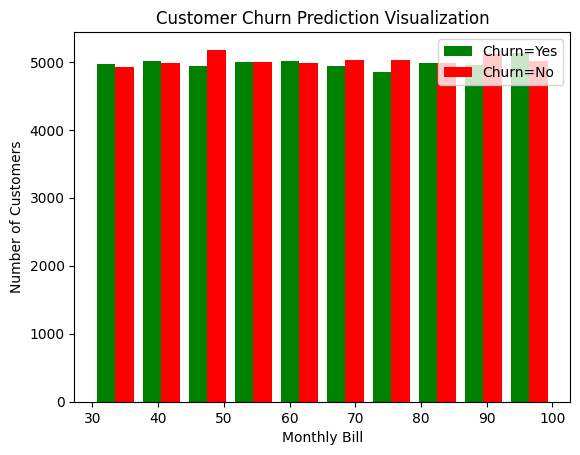

In [201]:
tenure_churn_no= df1[df1.Churn==0].Monthly_Bill
tenure_churn_yes= df1[df1.Churn==1].Monthly_Bill

plt.xlabel("Monthly Bill")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label= ['Churn=Yes', 'Churn=No'])
plt.legend()

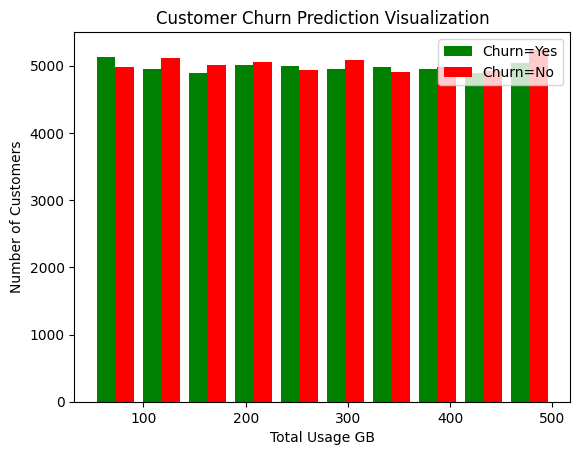

In [202]:
tenure_churn_no= df1[df1.Churn==0].Total_Usage_GB
tenure_churn_yes= df1[df1.Churn==1].Total_Usage_GB

plt.xlabel("Total Usage GB")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label= ['Churn=Yes', 'Churn=No'])
plt.legend()

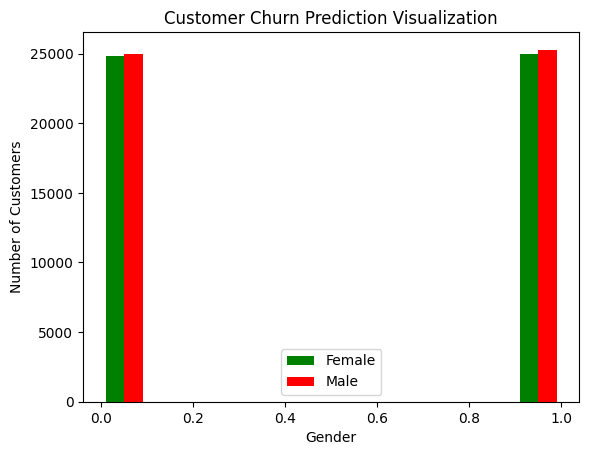

In [204]:
tenure_churn_no= df1[df1.Churn==0].Gender
tenure_churn_yes= df1[df1.Churn==1].Gender

plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label= ['Female', 'Male'])
plt.legend()

In [72]:
def print_unique_col_values(df1):
    for col in df:
        if df[col].dtypes=='object':
            print(f'{col} : {df[col].unique()}')

In [73]:
print_unique_col_values(df1)

Gender : ['Male' 'Female']
Location : ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [190]:
df1['Gender'].replace({'Female' : 1, 'Male': 0}, inplace=True)

In [191]:
df1['Gender'].unique()

array([0, 1], dtype=int64)

In [192]:
df2= pd.get_dummies(data=df1, columns=['Location'])

In [193]:
df2.sample(5)

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
33024,33025,29,0,10,47.99,385,1,False,True,False,False,False
99493,99494,50,1,12,44.83,276,0,False,False,False,True,False
13261,13262,44,0,12,52.63,233,0,False,False,False,True,False
34116,34117,57,0,11,56.78,335,1,False,False,False,False,True
42096,42097,53,1,18,56.46,335,1,False,True,False,False,False


In [194]:
df2.dtypes

CustomerID                      int64
Age                             int64
Gender                          int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Location_Chicago                 bool
Location_Houston                 bool
Location_Los Angeles             bool
Location_Miami                   bool
Location_New York                bool
dtype: object

In [195]:
df1['Location'].replace({'False' : 0, 'True': 1}, inplace=True)

In [196]:
df1.dtypes

CustomerID                      int64
Age                             int64
Gender                          int64
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [81]:
df2= pd.get_dummies(data=df1, columns=['Location'])

In [82]:
df2.sample(5)

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
17295,17296,36,1,9,46.73,295,1,False,False,True,False,False
33722,33723,50,1,20,68.97,225,1,False,False,False,True,False
33646,33647,39,0,13,57.90,401,1,False,False,False,False,True
54786,54787,23,0,14,69.14,52,1,False,False,True,False,False
39614,39615,26,1,12,40.72,471,1,False,False,True,False,False


In [188]:
df1['Gender'].replace({'Female' : 0, 'Male': 1}, inplace=True)

In [189]:
df2.sample(5)

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
66408,66409,28,0,24,41.84,123,1,True,False,False,False,False
33674,33675,28,1,24,40.04,303,1,False,False,False,True,False
74477,74478,38,1,8,53.33,496,0,False,False,False,False,True
6395,6396,31,1,22,31.64,408,1,False,False,False,True,False
2597,2598,45,0,7,57.89,132,0,False,False,False,False,True


In [ ]:
pd.to_numeric(df2.Location_Chicago)

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997     True
99998    False
99999    False
Name: Location_Chicago, Length: 100000, dtype: bool

In [ ]:
df2.sample(5)

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
79716,79717,60,0,24,83.84,182,0,False,False,False,True,False
39970,39971,31,0,19,32.91,255,1,False,False,False,False,True
85010,85011,62,1,8,67.35,145,1,False,False,True,False,False
62989,62990,70,0,12,75.40,393,1,True,False,False,False,False
67545,67546,50,1,12,46.36,74,0,False,False,True,False,False


In [ ]:
df2.drop('CustomerID', axis='columns', inplace=True)
df2.dtypes

Age                             int64
Gender                          int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Location_Chicago                 bool
Location_Houston                 bool
Location_Los Angeles             bool
Location_Miami                   bool
Location_New York                bool
dtype: object

In [ ]:
x= df2.drop('Churn', axis='columns')
y= df2['Churn']

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=5)

In [160]:
x_train.shape

(80000, 10)

In [161]:
y_train.shape

(80000,)

In [162]:
x_test.shape

(20000, 10)

In [163]:
x_train[:200]

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
46628,33,0,16,37.04,169,False,False,True,False,False
92846,41,0,8,85.82,84,False,False,False,True,False
30440,41,1,14,77.70,397,False,True,False,False,False
79978,22,0,12,68.29,180,False,False,False,True,False
85038,30,0,18,87.25,500,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
50334,29,1,19,47.74,93,False,True,False,False,False
36672,43,0,11,52.72,422,False,True,False,False,False
48664,27,0,13,47.26,165,False,False,True,False,False
62728,58,0,6,94.51,257,False,False,False,False,True


In [164]:
len(x_train.columns)

10

In [170]:
import tensorflow as tf
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

model_dt= DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train, y_train)



DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [171]:
y_pred= model_dt.predict(x_test)

d:\Akarsh Srivastav\Desktop files\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [172]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [173]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.74      0.60      9950
           1       0.51      0.26      0.35     10050

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000



In [174]:
print(confusion_matrix(y_test, y_pred))

[[7400 2550]
 [7401 2649]]


In [175]:
from imblearn.combine import SMOTEENN


In [176]:
sm= SMOTEENN()
x_resampled, y_resampled= sm.fit_resample(x,y)

In [177]:
xr_train, xr_test, yr_train, yr_test= train_test_split(x_resampled,y_resampled,test_size=0.2)

In [178]:
model_dt_smote= DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [179]:
model_dt_smote.fit(xr_train, yr_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [180]:
yr_pred_smote= model_dt_smote.predict(xr_test)

In [181]:
print(classification_report(yr_test, yr_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.54      0.46      0.50      1296
           1       0.54      0.61      0.57      1322

    accuracy                           0.54      2618
   macro avg       0.54      0.54      0.54      2618
weighted avg       0.54      0.54      0.54      2618



In [182]:
print(confusion_matrix(yr_test, yr_pred_smote))

[[602 694]
 [512 810]]


In [183]:
import pickle
filename= 'model.sav'

In [184]:
pickle.dump(model_dt_smote, open(filename, 'wb'))

In [185]:
load_model= pickle.load(open(filename, 'rb'))

In [186]:
load_model.score(xr_test, yr_test)

0.5393430099312452